In [1]:
#Suja Basnet
#Computer Vision
#Final Project 02

from PIL import Image, ImageFilter, ImageChops
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

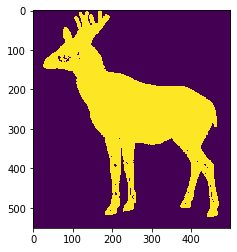

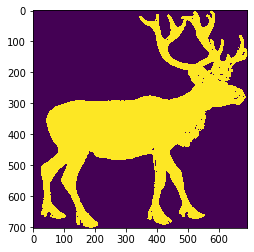

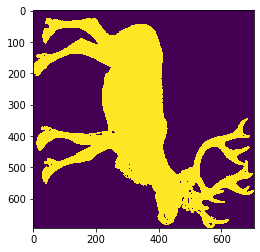

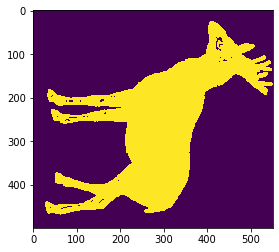

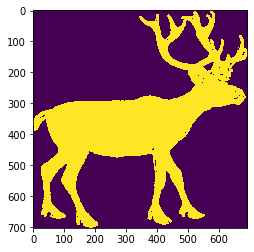

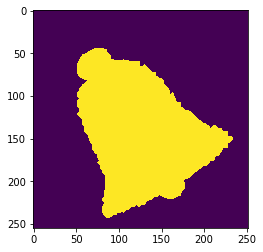

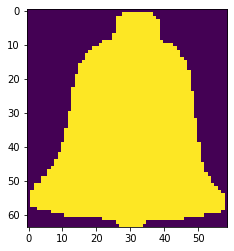

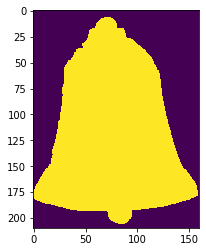

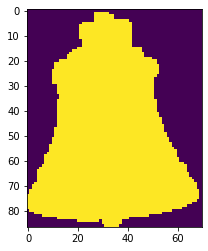

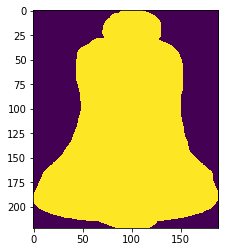

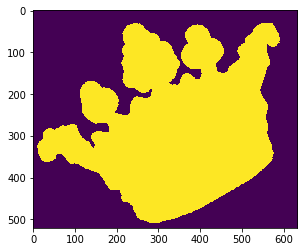

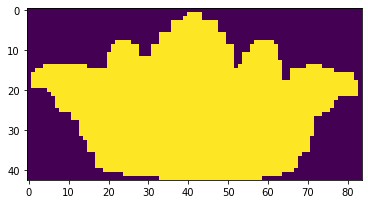

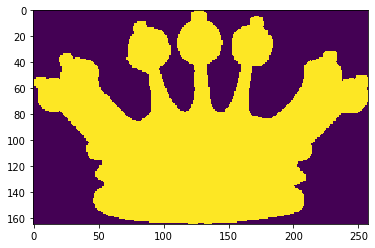

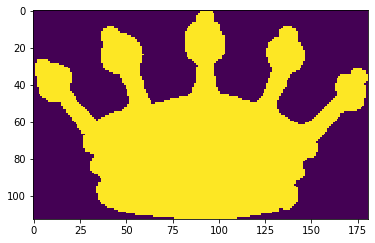

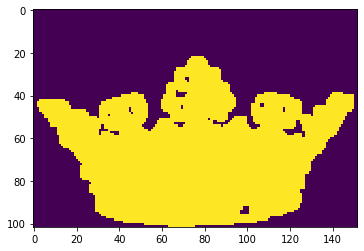

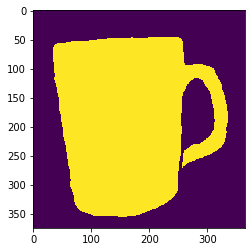

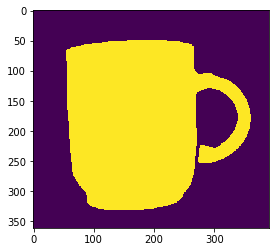

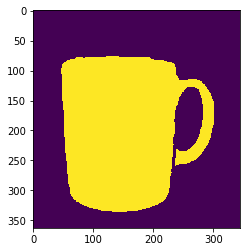

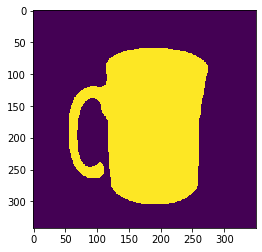

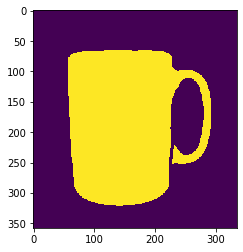

In [2]:
#reading the images from MPEG7 Datasets
image1c1 = mpimg.imread('deer-10.jpg')
image2c1 = mpimg.imread('deer-2.jpg')
image3c1 = mpimg.imread('deer-3.jpg')
image4c1 = mpimg.imread('deer-11.jpg')
image5c1 = mpimg.imread('deer-5.jpg')


image1c2 = mpimg.imread('bell-1.jpg')
image2c2 = mpimg.imread('bell-2.jpg')
image3c2 = mpimg.imread('bell-3.jpg')
image4c2 = mpimg.imread('bell-4.jpg')
image5c2 = mpimg.imread('bell-5.jpg')


image1c3 = mpimg.imread('crown-1.jpg')
image2c3 = mpimg.imread('crown-2.jpg')
image3c3 = mpimg.imread('crown-3.jpg')
image4c3 = mpimg.imread('crown-6.jpg')
image5c3 = mpimg.imread('crown-5.jpg')


image1c4 = mpimg.imread('cup-14.jpg')
image2c4 = mpimg.imread('cup-15.jpg')
image3c4 = mpimg.imread('cup-16.jpg')
image4c4 = mpimg.imread('cup-17.jpg')
image5c4 = mpimg.imread('cup-18.jpg')



ret,img1c1 = cv.threshold(image1c1,127,255,0)
ret,img2c1 = cv.threshold(image2c1,127,255,0)
ret,img3c1 = cv.threshold(image3c1,127,255,0)
ret,img4c1 = cv.threshold(image4c1,127,255,0)
ret,img5c1 = cv.threshold(image5c1,127,255,0)

ret,img1c2 = cv.threshold(image1c2,127,255,0)
ret,img2c2 = cv.threshold(image2c2,127,255,0)
ret,img3c2 = cv.threshold(image3c2,127,255,0)
ret,img4c2 = cv.threshold(image4c2,127,255,0)
ret,img5c2 = cv.threshold(image5c2,127,255,0)

ret,img1c3 = cv.threshold(image1c3,127,255,0)
ret,img2c3 = cv.threshold(image2c3,127,255,0)
ret,img3c3 = cv.threshold(image3c3,127,255,0)
ret,img4c3 = cv.threshold(image4c3,127,255,0)
ret,img5c3 = cv.threshold(image5c3,127,255,0)

ret,img1c4 = cv.threshold(image1c4,127,255,0)
ret,img2c4 = cv.threshold(image2c4,127,255,0)
ret,img3c4 = cv.threshold(image3c4,127,255,0)
ret,img4c4 = cv.threshold(image4c4,127,255,0)
ret,img5c4 = cv.threshold(image5c4,127,255,0)

imgs= [img1c1, img2c1, img3c1,
       img4c1, img5c1, img1c2,
       img2c2, img3c2,img4c2,
       img5c2,img1c3, img2c3,
       img3c3, img4c3,img5c3,img1c4,
       img2c4, img3c4, img4c4,img5c4]

for i in range(20):
    plt.figure()
    plt.imshow(imgs[i])


In [3]:
#Finding the centroid of each image
imgsLabeled = np.empty(20, dtype=object) 
cX = np.empty(20, dtype=object) 
cY = np.empty(20, dtype=object) 


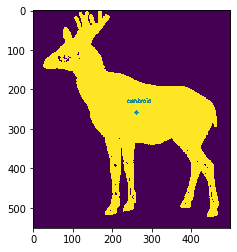

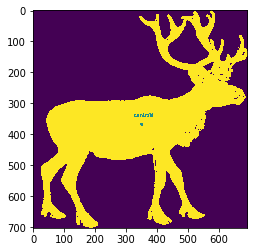

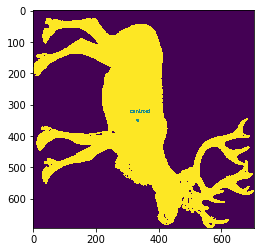

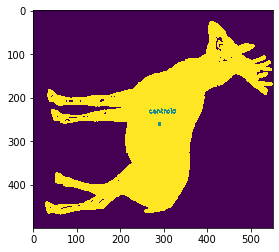

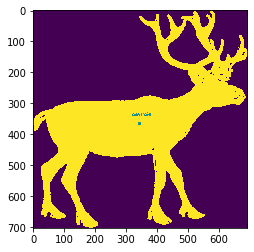

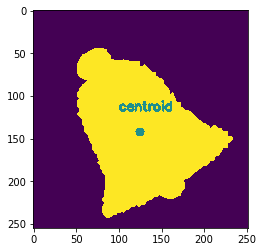

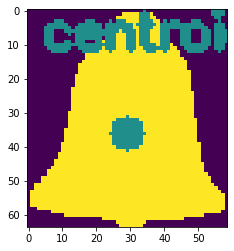

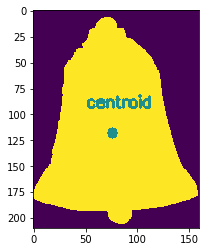

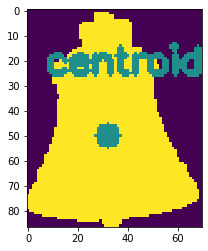

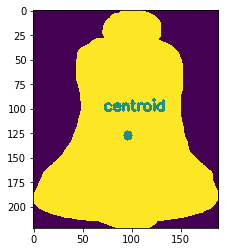

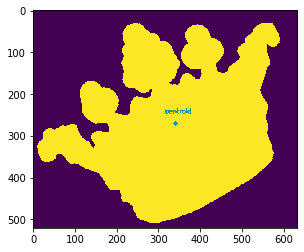

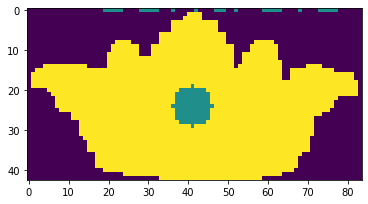

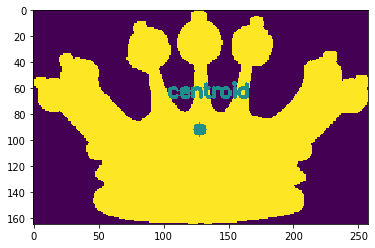

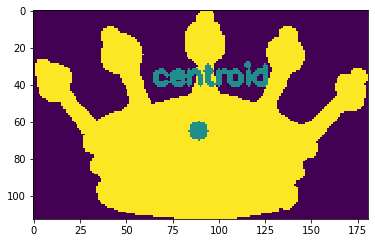

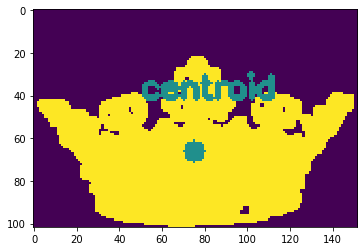

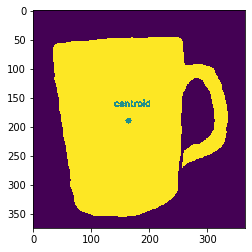

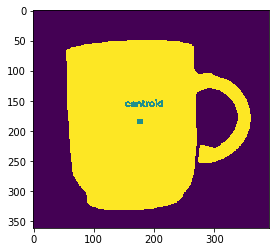

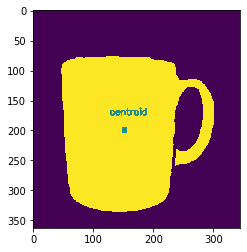

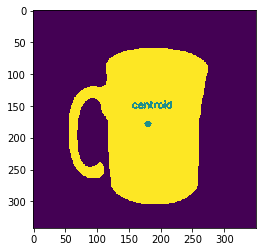

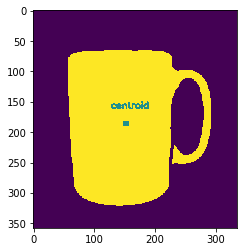

In [4]:
for i in range(20):
    M = cv.moments(imgs[i])
    cX[i] = int(M["m10"] / M["m00"])
    cY[i] = int(M["m01"] / M["m00"])
    imgsLabeled[i] = imgs[i].copy()
    cv.circle(imgsLabeled[i], (cX[i], cY[i]), 5, (127, 127, 127), -1)
    cv.putText(imgsLabeled[i], "centroid", (cX[i] - 25, cY[i] - 25),cv.FONT_HERSHEY_SIMPLEX, 0.5, (127, 127, 127), 2)
    plt.figure()
    plt.imshow(imgsLabeled[i])

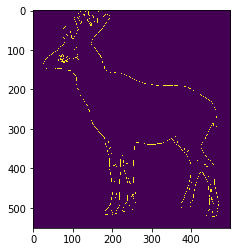

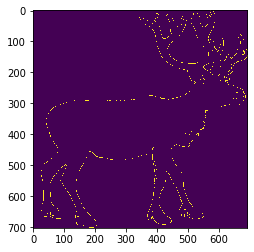

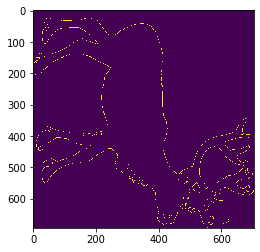

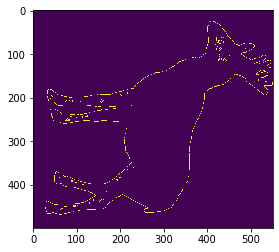

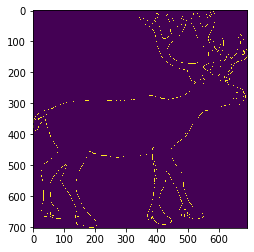

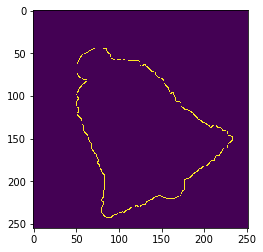

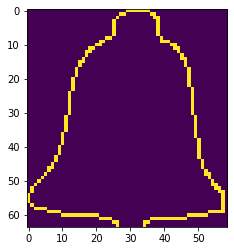

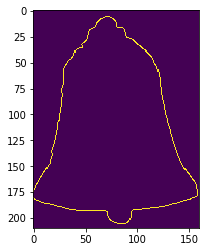

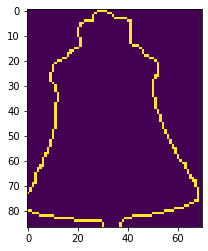

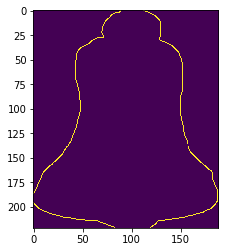

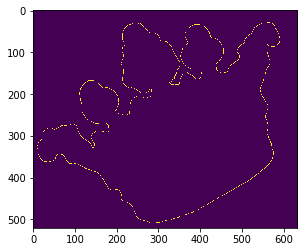

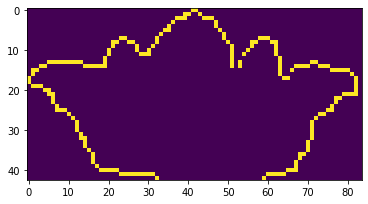

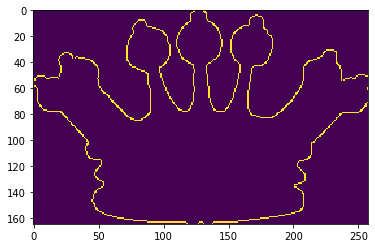

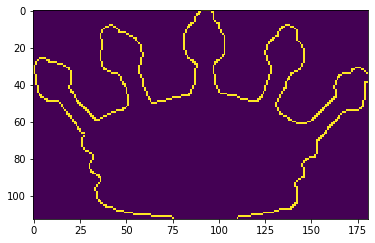

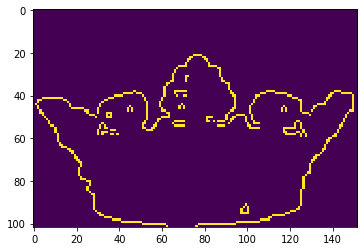

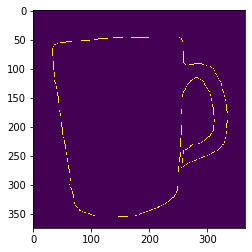

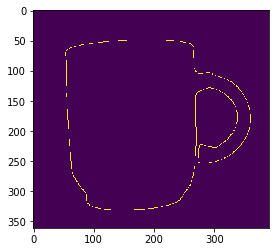

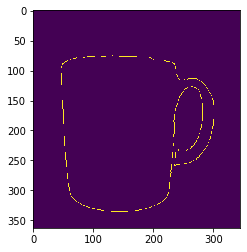

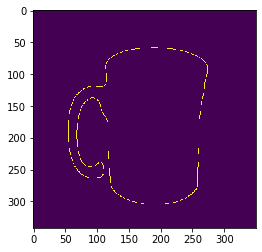

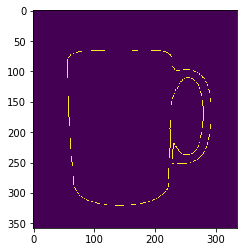

In [5]:
# Finding the boundary of each image
imgEdges = np.empty(20, dtype=object)
for i in range(20):
    imgEdges[i] = cv.Canny(imgs[i],100,200)
    plt.figure()
    plt.imshow(imgEdges[i])

In [6]:
# Create vectors to hold edge coordinates
edgeCoordinates = [ [] for _ in range(20) ]
# Find each edge pixel to centroid and add it to its respective vector

for i in range(20):
    for j in range(imgEdges[i].shape[0]):
        for k in range(imgEdges[i].shape[1]):
            if imgEdges[i][j,k] == 255:
                edgeCoordinates[i].append([j,k])

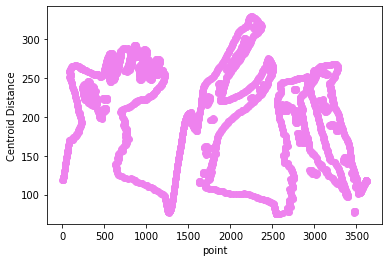

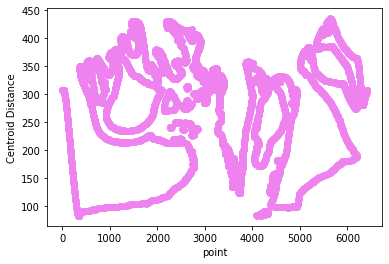

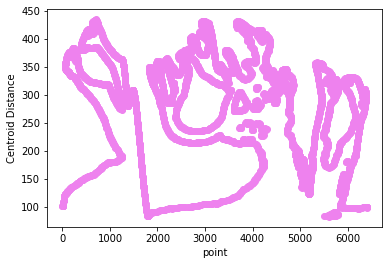

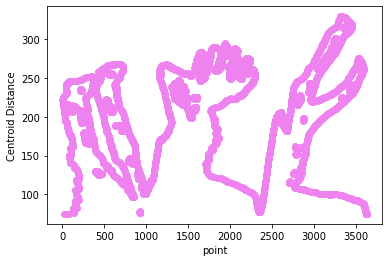

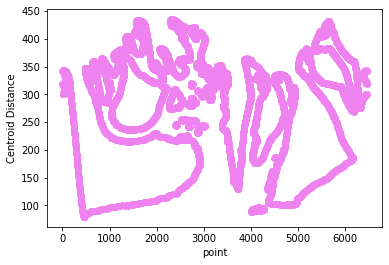

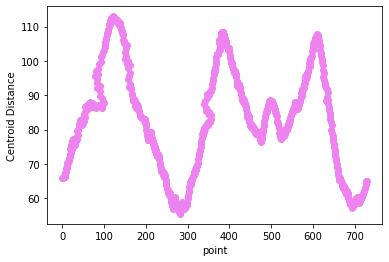

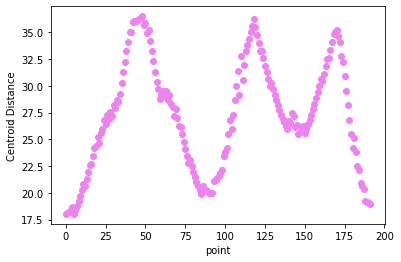

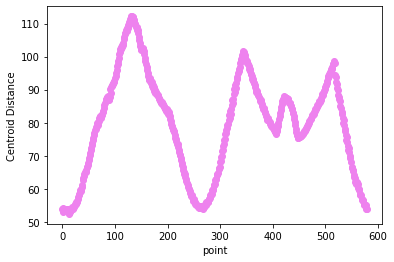

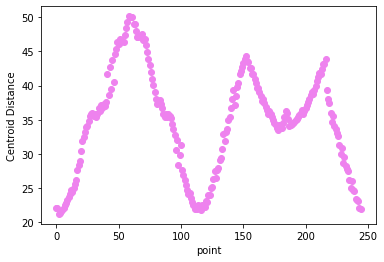

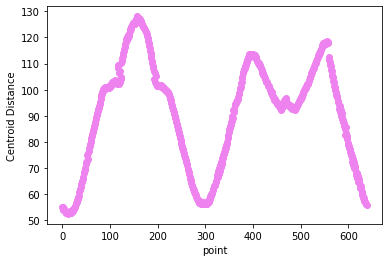

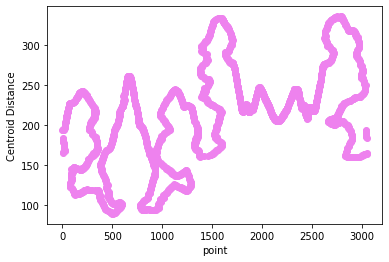

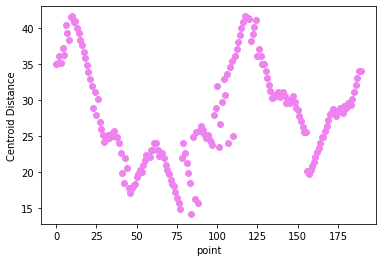

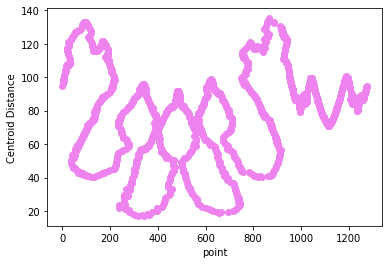

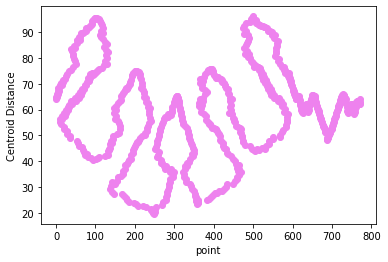

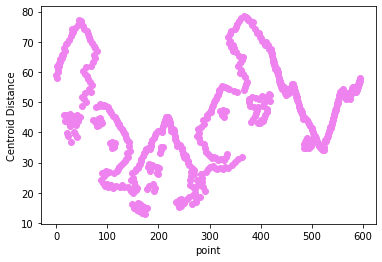

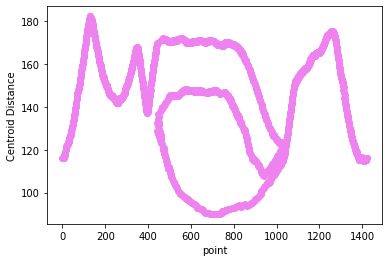

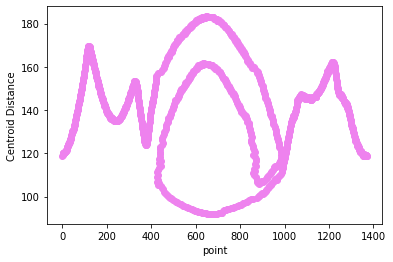

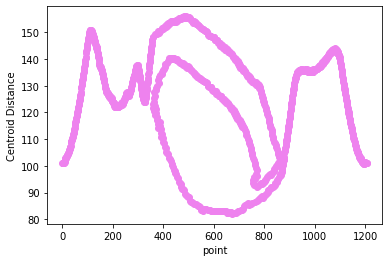

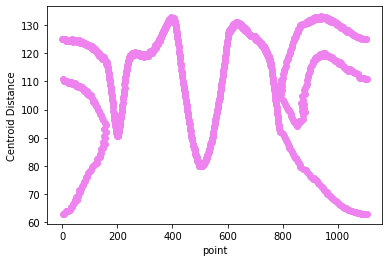

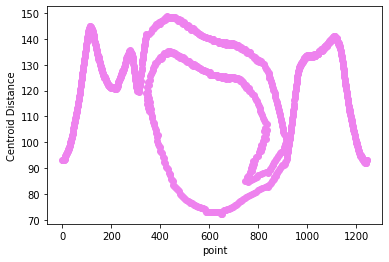

In [7]:
# Create vectors to hold edge coordinate and centroid angles
angles = [ [] for _ in range(20) ]

# find angle of each line and sort edge coordinates by angle to centroid
for i in range(20):
    for j in edgeCoordinates[i]:
        angles[i].append(math.atan2(j[0] - cY[i], j[1] - cX[i]))
    angles[i], edgeCoordinates[i] = (list(t) for t in zip(*sorted(zip(angles[i], edgeCoordinates[i]))))

# Create 1D feature vectors
featureVectors = [ [] for _ in range(20) ]

# Find distance from each edge pixel to centroid and add it to feature vector
for i in range(20):
    for j in edgeCoordinates[i]:
        featureVectors[i].append(np.sqrt((j[0]-cY[i])**2 + (j[1]-cX[i])**2))

for i in range(0,20):
    x1 = np.arange(0, len(featureVectors[i]))
    plt.xlabel("point")
    plt.ylabel("Centroid Distance")
    plt.plot(x1, featureVectors[i], 'o', color ="violet")
    plt.show()

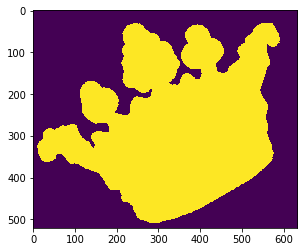

In [8]:
#Template-Based Matching
templateimage = mpimg.imread('template.jpg')
ret,templateimage1 = cv.threshold(templateimage,127,255,0)
plt.figure()
plt.imshow(templateimage1)

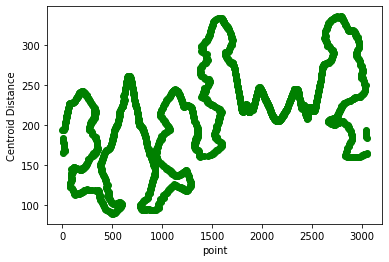

In [9]:
#Computing Feature vector
Mt = cv.moments(templateimage1)
cXt = int(Mt["m10"] / Mt["m00"])
cYt = int(Mt["m01"] / Mt["m00"])

templateEdges = cv.Canny(templateimage1,100,200)

templateEdgeCoordinates = []
templateAngles = []
templateFeatureVector = []

for j in range(templateEdges.shape[0]):
    for k in range(templateEdges.shape[1]):
        if templateEdges[j,k] == 255:
            templateEdgeCoordinates.append([j,k])

for j in templateEdgeCoordinates:
    templateAngles.append(math.atan2(j[0] - cYt, j[1] - cXt))
    
templateAngles, templateEdgeCoordinates = (list(t) for t in zip(*sorted(zip(templateAngles, templateEdgeCoordinates))))

for j in templateEdgeCoordinates:
    templateFeatureVector.append(np.sqrt((j[0]-cYt)**2 + (j[1]-cXt)**2))
    
x1 = np.arange(0, len(templateFeatureVector))
plt.xlabel("point")  
plt.ylabel("Centroid Distance")  
plt.plot(x1, templateFeatureVector, 'o', color ="green")  
plt.show()

In [10]:
#Computing Dynamice Time Warping(DTW)
dtw_template =  np.empty(20, dtype=object)
distance_template = np.zeros(20)

for i in range(20):
    n, m = len(featureVectors[i]), len(templateFeatureVector)
    dtw_template[i] = np.zeros((n+1, m+1))
    for k in range(n+1):
        for l in range(m+1):
            dtw_template[i][k, l] = np.inf
    dtw_template[i][0, 0] = 0
    
    for k in range(1, n+1):
        cost = abs(featureVectors[i][k-1] - templateFeatureVector[0])
        last_min = dtw_template[i][k-1, 0]
        dtw_template[i][k, 0] = cost + last_min
        
    for l in range(1, m+1):
        cost = abs(featureVectors[i][0] - templateFeatureVector[l-1])
        last_min = dtw_template[i][0, l-1]
        dtw_template[i][0, l] = cost + last_min
    
    for k in range(1, n+1):
        for l in range(1, m+1):
            cost = abs(featureVectors[i][k-1] - templateFeatureVector[l-1])
            last_min = np.min([dtw_template[i][k-1, l], dtw_template[i][k, l-1], dtw_template[i][k-1, l-1]])
            dtw_template[i][k, l] = cost + last_min
    
    distance_template[i] = dtw_template[i][n, m]

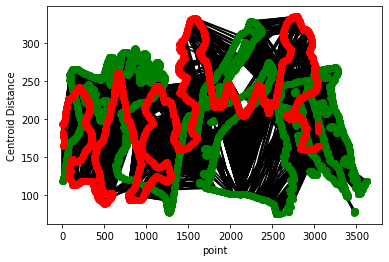

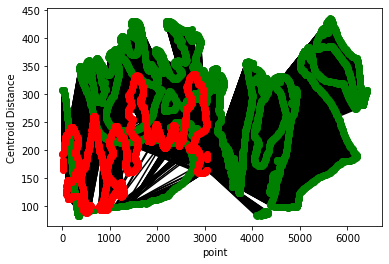

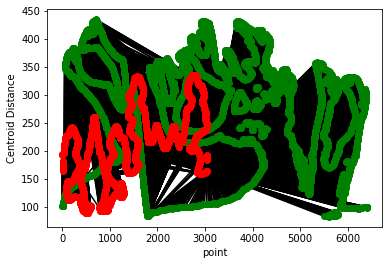

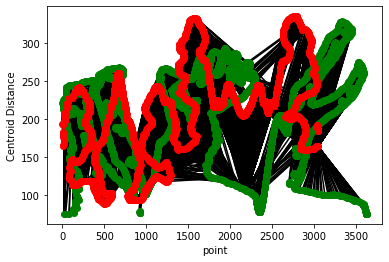

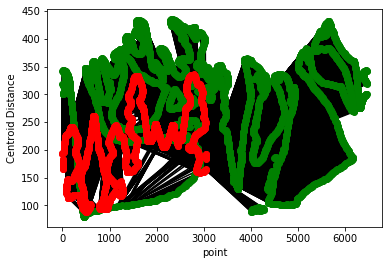

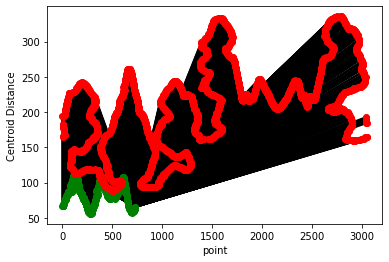

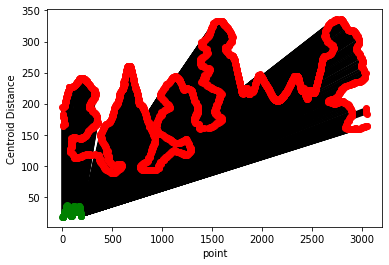

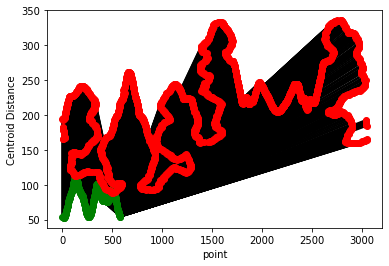

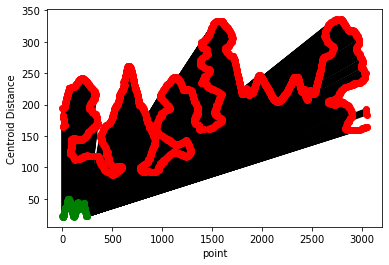

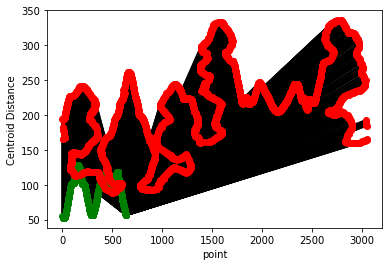

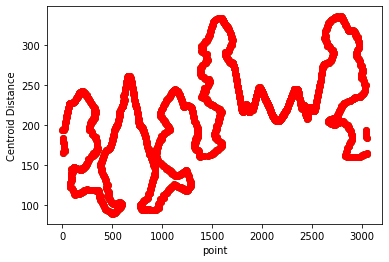

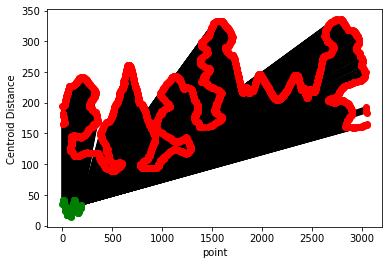

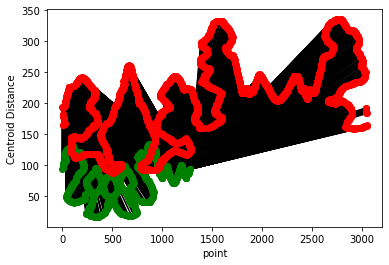

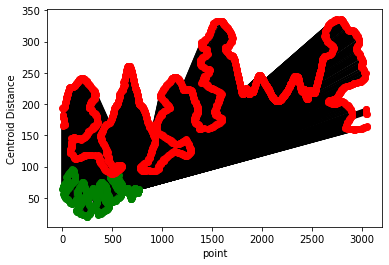

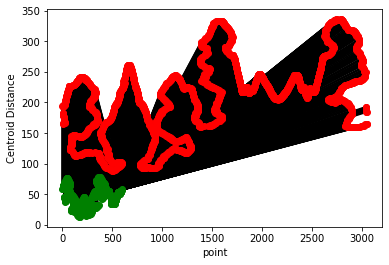

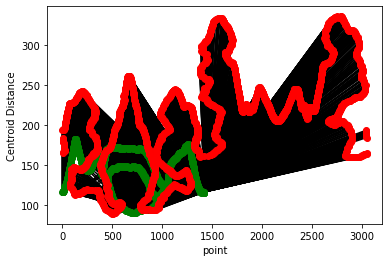

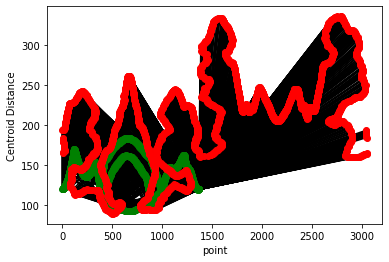

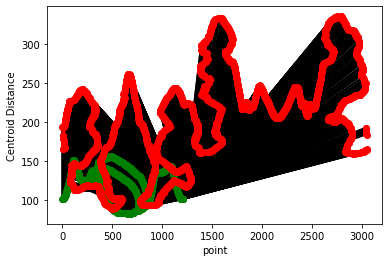

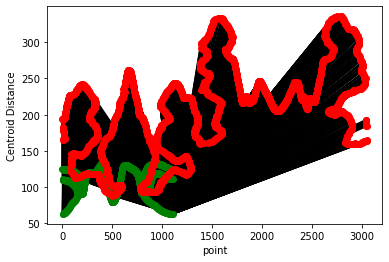

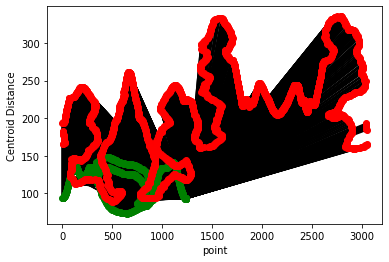

In [12]:
for i in range(0,20):
    x1 = np.arange(0, len(featureVectors[i]))
    x2 = np.arange(0, len(templateFeatureVector))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    k = 0
    l = 0
    plt.plot([k,l],[featureVectors[i][k],templateFeatureVector[l]],'k-')

    while k < len(dtw_template[i])-2 or l < len(dtw_template[i][0])-2:
        if k == len(dtw_template[i])-2:
            l += 1
        elif l == len(dtw_template[i][0])-2:
            k += 1
        elif np.min([dtw_template[i][k+1, l], dtw_template[i][k, l+1], dtw_template[i][k+1, l+1]]) == dtw_template[i][k+1, l]:
            k += 1
        elif np.min([dtw_template[i][k+1, l], dtw_template[i][k, l+1], dtw_template[i][k+1, l+1]]) == dtw_template[i][k, l+1]:
            l += 1
        else:
            k += 1
            l += 1
        plt.plot([k,l],[featureVectors[i][k],templateFeatureVector[l]],'k-')
                   
    plt.plot(x1, featureVectors[i], 'o', color ="green") 
    plt.plot(x2, templateFeatureVector, 'o', color ="red")         

    plt.show()

In [13]:
print("Deer distances")    
print("deer10:",distance_template[0])
print("deer2:",distance_template[1])
print("deer3:",distance_template[2])
print("deer11:",distance_template[3])
print("deer11:",distance_template[4])
print("") 


print ("Bell distances")    
print("bell1:",distance_template[5])
print("bell2:",distance_template[6])
print("bell3:",distance_template[7])
print("bell4:",distance_template[8])
print("bell5:",distance_template[9])
print("") 

print ("Crown distances")   
print("crown1:",distance_template[10])
print("crown2:",distance_template[11])
print("crown3:",distance_template[12])
print("crown:6",distance_template[13])
print("crown:5",distance_template[14])
print("") 

print ("Cup distances")
print("Cup14:",distance_template[15])
print("Cup15:",distance_template[16])
print("Cup16:",distance_template[17])
print("Cup17:",distance_template[18])
print("Cup18:",distance_template[19])
print("") 

                

Deer distances
deer10: 125670.51086210978
deer2: 351067.21968522976
deer3: 348770.15181890497
deer11: 111008.41014816199
deer11: 358064.2537620103

Bell distances
bell1: 331433.9415111736
bell2: 540781.1034246933
bell3: 330505.13348473195
bell4: 501102.08667090593
bell5: 294365.3299887001

Crown distances
crown1: 0.0
crown2: 526044.3430401523
crown3: 294189.2729692391
crown:6 382788.39357513713
crown:5 431003.8911797595

Cup distances
Cup14: 172229.19409264886
Cup15: 171873.76116348617
Cup16: 232702.22580978408
Cup17: 268037.73747829325
Cup18: 246454.4376700217



In [14]:
temp = distance_template.argsort()
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(distance_template))

print ("Deer ranks")
print("deer1:",ranks[0])
print("deer2:",ranks[1])
print("deer3:",ranks[2])
print("deer4:",ranks[3])
print("deer5:",ranks[4])
print("")

print ("Bell ranks")
print("bell1:",ranks[0])
print("bell2:",ranks[1])
print("bell3:",ranks[2])
print("bell4:",ranks[3])
print("bell5:",ranks[4])
print("")

print ("Crown ranks")
print("crown1:",ranks[10])
print("crown2:",ranks[11])
print("crown3:",ranks[12])
print("crown4:",ranks[13])
print("crown5:",ranks[14])
print("")

print ("Cup ranks")
print("cup1:",ranks[15])
print("cup2:",ranks[16])
print("cup3:",ranks[17])
print("cup4:",ranks[18])
print("cup5:",ranks[10])
print("")

Deer ranks
deer1: 2
deer2: 13
deer3: 12
deer4: 1
deer5: 14

Bell ranks
bell1: 2
bell2: 13
bell3: 12
bell4: 1
bell5: 14

Crown ranks
crown1: 0
crown2: 18
crown3: 8
crown4: 15
crown5: 16

Cup ranks
cup1: 4
cup2: 3
cup3: 5
cup4: 7
cup5: 0



In [15]:
fbVectors = [featureVectors[1], featureVectors[2], featureVectors[3],
            featureVectors[5], featureVectors[6], featureVectors[7],
            featureVectors[9], featureVectors[10], featureVectors[11],
            featureVectors[13], featureVectors[14], featureVectors[15],
            featureVectors[17], featureVectors[18], featureVectors[19]]

comparisonVectors = [featureVectors[0], featureVectors[0], featureVectors[0],
                    featureVectors[4], featureVectors[4], featureVectors[4],
                    featureVectors[8], featureVectors[8], featureVectors[8],
                    featureVectors[12], featureVectors[12], featureVectors[12],
                    featureVectors[16], featureVectors[16], featureVectors[16]]

In [16]:
dtw_feature =  np.empty(15, dtype=object)
distance_feature = np.zeros(15)

for i in range(15):
    n, m = len(fbVectors[i]), len(comparisonVectors[i])
    dtw_feature[i] = np.zeros((n+1, m+1))
    for k in range(n+1):
        for l in range(m+1):
            dtw_feature[i][k, l] = np.inf
    dtw_feature[i][0, 0] = 0
    
    for k in range(1, n+1):
        cost = abs(fbVectors[i][k-1] - comparisonVectors[i][0])
        last_min = dtw_feature[i][k-1, 0]
        dtw_feature[i][k, 0] = cost + last_min
        
    for l in range(1, m+1):
        cost = abs(fbVectors[i][0] - comparisonVectors[i][l-1])
        last_min = dtw_feature[i][0, l-1]
        dtw_feature[i][0, l] = cost + last_min
    
    for k in range(1, n+1):
        for l in range(1, m+1):
            cost = abs(fbVectors[i][k-1] - comparisonVectors[i][l-1])
            last_min = np.min([dtw_feature[i][k-1, l], dtw_feature[i][k, l-1], dtw_feature[i][k-1, l-1]])
            dtw_feature[i][k, l] = cost + last_min
    
    distance_feature[i] = dtw_feature[i][n, m]

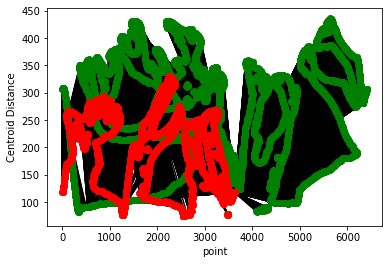

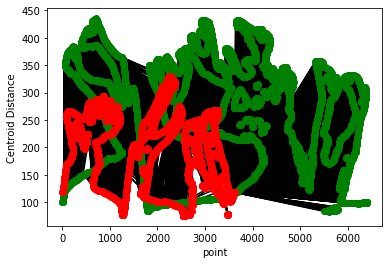

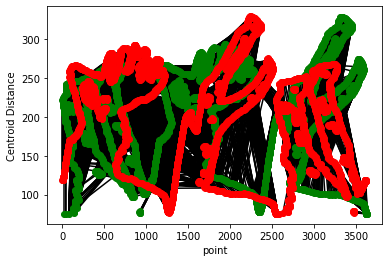

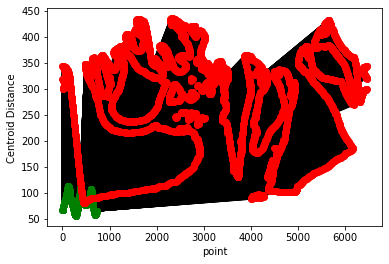

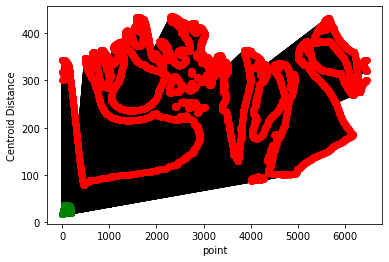

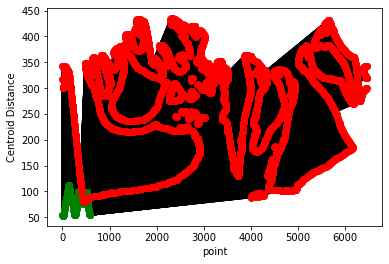

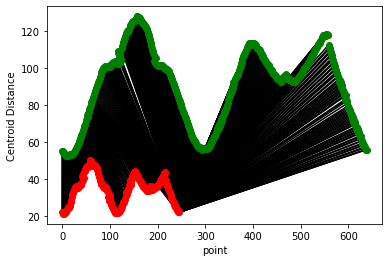

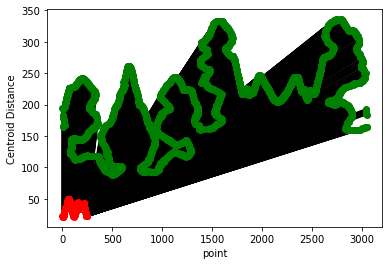

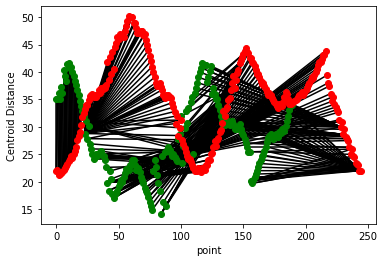

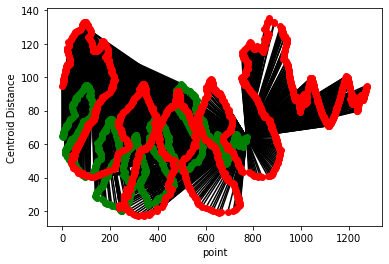

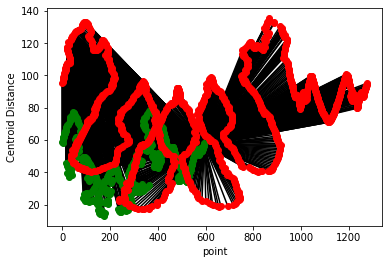

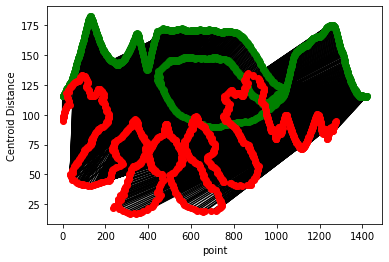

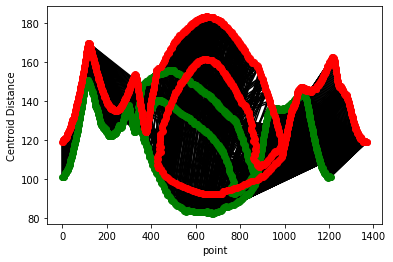

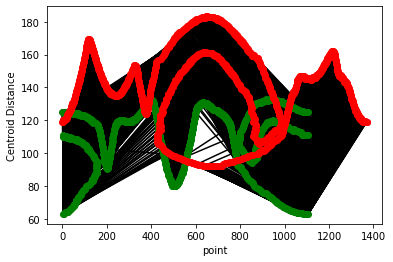

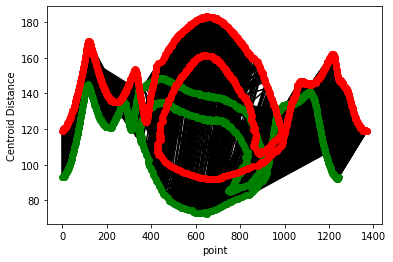

In [17]:
for i in range(0,15):
    x1 = np.arange(0, len(fbVectors[i]))
    x2 = np.arange(0, len(comparisonVectors[i]))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    k = 0
    l = 0
    plt.plot([k,l],[fbVectors[i][k],comparisonVectors[i][l]],'k-')

    while k < len(dtw_feature[i])-2 or l < len(dtw_feature[i][0])-2:
        if k == len(dtw_feature[i])-2:
            l += 1
        elif l == len(dtw_feature[i][0])-2:
            k += 1
        elif np.min([dtw_feature[i][k+1, l], dtw_feature[i][k, l+1], dtw_feature[i][k+1, l+1]]) == dtw_feature[i][k+1, l]:
            k += 1
        elif np.min([dtw_feature[i][k+1, l], dtw_feature[i][k, l+1], dtw_feature[i][k+1, l+1]]) == dtw_feature[i][k, l+1]:
            l += 1
        else:
            k += 1
            l += 1
        plt.plot([k,l],[fbVectors[i][k],comparisonVectors[i][l]],'k-')
                   
    plt.plot(x1, fbVectors[i], 'o', color ="green") 
    plt.plot(x2, comparisonVectors[i], 'o', color ="red")         

    plt.show()
    
    

In [18]:
print("Deer distances")
print("deer10:",distance_feature[0])
print("deer2:",distance_feature[1])
print("deer2:",distance_feature[2])
print("")

print ("Bell distances")
print("bell2:",distance_feature[3])
print("bell3:",distance_feature[4])
print("bell4:",distance_feature[5])
print("")

print ("Crown distances")
print("crown2:",distance_feature[6])
print("crown3:",distance_feature[7])
print("crown4:",distance_feature[8])
print("")

print ("Cup distances")
print("cup2:",distance_feature[9])
print("cup3:",distance_feature[10])
print("cup4:",distance_feature[11])
print("")

Deer distances
deer10: 415666.32109341293
deer2: 368549.1598760866
deer2: 108084.69737446116

Bell distances
bell2: 1182964.988172448
bell3: 1648613.0418497187
bell4: 1184534.8286119557

Crown distances
crown2: 29947.492137679026
crown3: 501102.08667090593
crown4: 846.5599448973057

Cup distances
cup2: 20719.893708920605
cup3: 29423.80587317888
cup4: 61777.925581721094

